In [1]:
import sys
sys.path.insert(0,'..')
from dfply import *
import pandas as pd
from plotnine import *
import numpy as np

In [2]:
v_ratio_dist = np.load('v_ratio_dist.npy', allow_pickle=True)
v_ratio_dist = v_ratio_dist.item()['v_ratio_dist']

v_ratio_dist_sum = v_ratio_dist >> group_by(X.sig, X.method) >> \
    summarize(mean_ratio = X.var_ratio.mean()*100,
              sd_ratio = X.var_ratio.std()*100)

/opt/conda/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


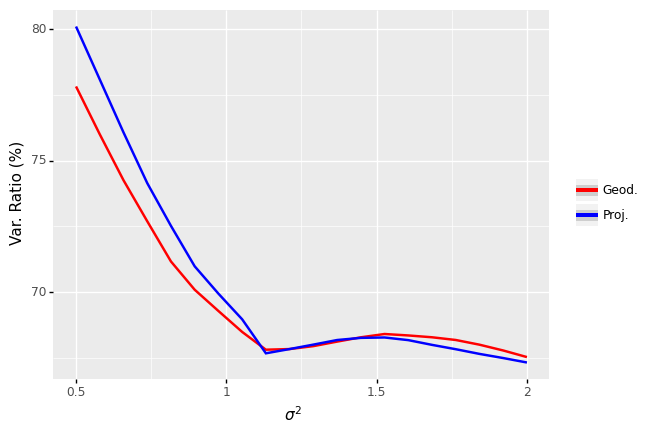

<ggplot: (8727078397121)>

In [3]:
p = ggplot(v_ratio_dist_sum) + \
    aes(x = 'sig', y = 'mean_ratio', color = 'method') + \
    geom_smooth(span = 0.3) + \
    labs(y = 'Var. Ratio (%)', x = r'$\sigma^2$', color = ' ') + \
    scale_color_manual(values = ['red', 'blue'], labels = ['Geod.', 'Proj.'])

ggsave(plot=p, filename='v_ratio_dist.png', width = 10, height = 10, units = 'cm', dpi = 320)

In [19]:
v_ratio = np.load('v_ratio.npy', allow_pickle=True)
v_ratio = v_ratio.item()['v_ratio']

In [20]:
v_ratio_sum = v_ratio >> group_by(X.sig, X.method, X.component) >> \
    summarize(mean_ratio = X.var_ratio.mean(),
              sd_ratio = X.var_ratio.std())

v_ratio_cumsum = v_ratio_sum >> \
    group_by(X.sig, X.method) >> \
    mutate(cum_ratio = X.mean_ratio.cumsum()*100) >> \
    select(X.component, X.sig, X.method, X.cum_ratio)

def col_func(sig):
    return r'$\sigma =$' + sig


p = ggplot(v_ratio_cumsum) + \
    facet_wrap('sig', ncol = 2, labeller = labeller(cols = col_func)) + \
    aes(x = 'component', y = 'cum_ratio', color = 'method') + \
    geom_line(size = 1) + \
    labs(y = 'Cum. Var. Ratio (%)', x = 'Principal Components', color = '') + \
    scale_color_manual(values = ['red', 'blue'])

ggsave(plot=p, filename='v_ratio.png', width = 10, height = 10, units = 'cm', dpi = 320)

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 10.0 x 10.0 cm image.
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: v_ratio.png
